In [3]:
import pandas as pd

# Load tab-delimited file
df = pd.read_csv(r"household_power_consumption.txt", delimiter="\t")  # or use "|" for pipe-delimited

# Save as CSV
df.to_csv("output_file.csv", index=False)

In [5]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.


In [4]:

df.to_csv("processed_power_data.csv", index=False)


In [5]:

# Read the CSV with semicolon delimiter
file_path = r'C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv'
df = pd.read_csv(file_path, delimiter=';')

# Optional: Preview and clean column names if needed
df.columns = [col.strip() for col in df.columns]

# Save back as comma-separated CSV
df.to_csv(file_path, index=False)


C:\Users\pavit\AppData\Local\Temp\ipykernel_9288\2789449044.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';')


In [7]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [8]:

# Check column names and data types
print(df.dtypes)



Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numeric values with mean (or use dropna(), median, etc.)
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, fill with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [10]:
print(df.isnull().sum())


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [17]:


# Clean column names
df.columns = df.columns.str.strip()


# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create new datetime-based features
df['date'] = df['Date'].dt.date
df['day_of_week'] = df['Date'].dt.day_name()

# ✅ NEW: Add separate day, month, year columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')


# Extract hour, minute, and second into separate columns
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second


# Save the updated file
df.to_csv(r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv", index=False)

# Show a preview of the new columns
print(df[['date', 'day', 'month', 'year', 'day_of_week']].head())
print(df[['Time', 'Hour', 'Minute', 'Second']].head())


         date  day  month  year day_of_week
0  2006-12-16   16     12  2006    Saturday
1  2006-12-16   16     12  2006    Saturday
2  2006-12-16   16     12  2006    Saturday
3  2006-12-16   16     12  2006    Saturday
4  2006-12-16   16     12  2006    Saturday
                 Time  Hour  Minute  Second
0 1900-01-01 17:24:00    17      24       0
1 1900-01-01 17:25:00    17      25       0
2 1900-01-01 17:26:00    17      26       0
3 1900-01-01 17:27:00    17      27       0
4 1900-01-01 17:28:00    17      28       0


In [ ]:
df.info()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns



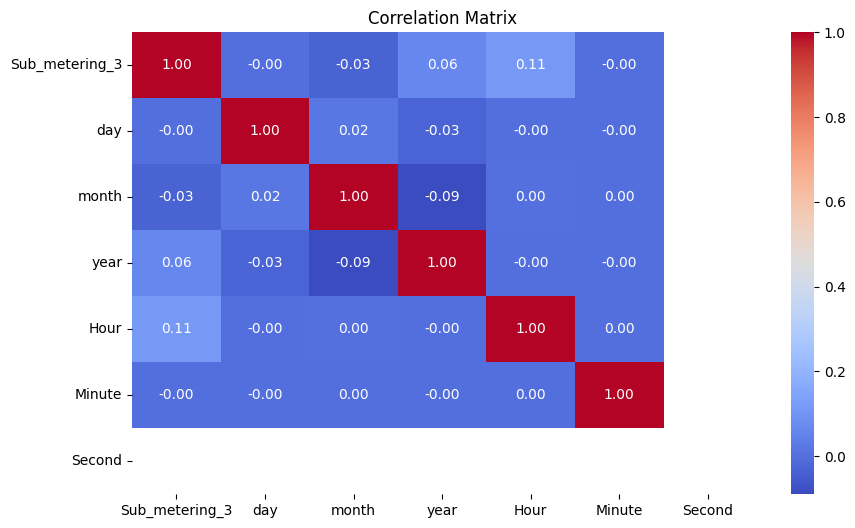

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


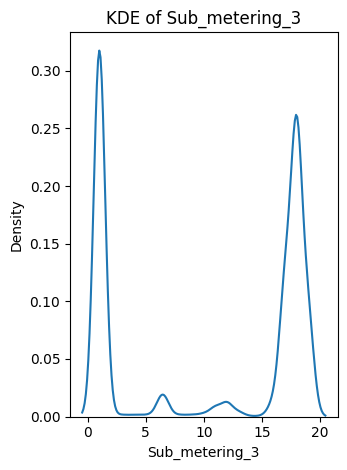

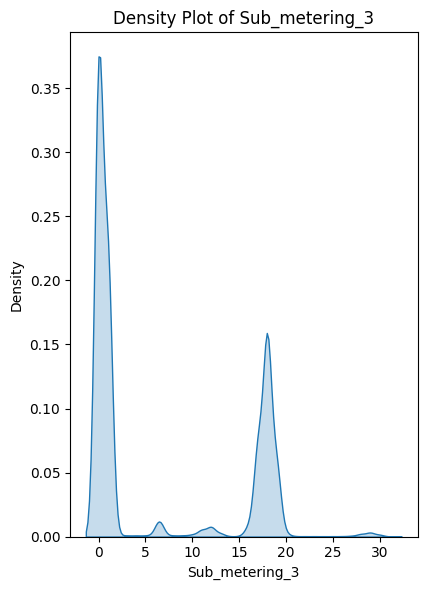

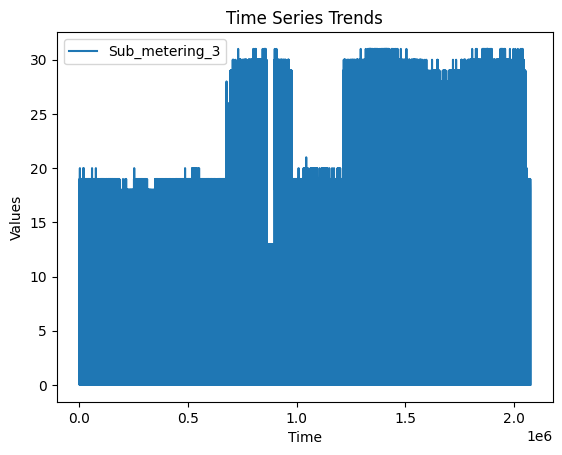

In [22]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
clean_df = df[numerical_cols].dropna()
clean_df = clean_df[(clean_df < clean_df.quantile(0.99)) & (clean_df > clean_df.quantile(0.01))]

for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    sns.kdeplot(x=clean_df[col])
    plt.title(f'KDE of {col}')
plt.tight_layout()


# KDE plots for distribution
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

for col in numerical_cols[:4]:  # limit to first 4 for readability
  plt.plot(df.index, df[col], label=col)
  plt.legend()
  plt.title("Time Series Trends")
  plt.xlabel("Time")
  plt.ylabel("Values")
  plt.show()


In [24]:
# Load dataset
file_path = r'processed_power_data.csv'
df = pd.read_csv(file_path)

# Detect and parse datetime column
time_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]
if not time_cols:
    raise ValueError("No datetime column found.")
df[time_cols[0]] = pd.to_datetime(df[time_cols[0]])
df = df.set_index(time_cols[0])

# Extract time-based features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['month'] = df.index.month

# Select a main numeric column for advanced features
target_col = df.select_dtypes(include=['float64', 'int64']).columns[0]  # Example: first numeric column

# Daily summary: mean, max, min
df.index = pd.to_datetime(df.index)

# --- Daily summary ---
daily_summary = df.resample('D')[target_col].agg(['mean', 'max', 'min']).rename(
    columns={'mean': 'daily_avg', 'max': 'daily_max', 'min': 'daily_min'}
)
df['date_only'] = df.index.date  # temporary column for merging
daily_summary['date_only'] = daily_summary.index.date

# Merge daily summary
df = df.merge(daily_summary, on='date_only', how='left')

# --- Peak hour per day ---
peak_hours = df.groupby(['date_only', 'hour'])[target_col].mean().reset_index()
peak_hour_df = peak_hours.loc[peak_hours.groupby('date_only')[target_col].idxmax()]
peak_hour_df.columns = ['date_only', 'peak_hour', 'peak_value']

# Merge peak hour info
df = df.merge(peak_hour_df[['date_only', 'peak_hour']], on='date_only', how='left')


# Final preview
print("\n🆕 Features Added:")
print(df[[target_col, 'hour', 'weekday', 'daily_avg', 'peak_hour']].head())


C:\Users\pavit\AppData\Local\Temp\ipykernel_9288\3387405224.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



🆕 Features Added:
   Sub_metering_3  hour   weekday  daily_avg  peak_hour
0            17.0     0  Saturday  12.439394          0
1            16.0     0  Saturday  12.439394          0
2            17.0     0  Saturday  12.439394          0
3            17.0     0  Saturday  12.439394          0
4            17.0     0  Saturday  12.439394          0


In [27]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date,day_of_week,day,month,year,Hour,Minute,date_only,daily_avg,daily_max,daily_min
0,1900-01-01 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16,Saturday,16,12,2006,17,24,2006-12-16,12.439394,18.0,0.0
1,1900-01-01 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16,Saturday,16,12,2006,17,25,2006-12-16,12.439394,18.0,0.0
2,1900-01-01 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16,Saturday,16,12,2006,17,26,2006-12-16,12.439394,18.0,0.0
3,1900-01-01 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16,Saturday,16,12,2006,17,27,2006-12-16,12.439394,18.0,0.0
4,1900-01-01 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16,Saturday,16,12,2006,17,28,2006-12-16,12.439394,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,1900-01-01 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26,Friday,26,11,2010,20,58,2010-11-26,7.908947,19.0,0.0
2075255,1900-01-01 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26,Friday,26,11,2010,20,59,2010-11-26,7.908947,19.0,0.0
2075256,1900-01-01 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26,Friday,26,11,2010,21,0,2010-11-26,7.908947,19.0,0.0
2075257,1900-01-01 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26,Friday,26,11,2010,21,1,2010-11-26,7.908947,19.0,0.0


In [26]:
df.drop(columns =['Second','weekday','peak_hour','hour'],inplace=True)    

In [28]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week_encoded'] = df['day_of_week'].map(day_mapping)


In [29]:
# Example feature engineering
df['hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['working_hour'] = df['hour'].between(9, 17).astype(int)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')


In [30]:
df['power_diff'] = df['Global_active_power'] - df['Global_reactive_power']
df['load_ratio'] = df['Global_active_power'] / df['Global_intensity']


In [33]:
# Convert 'Time' to time only (if it's datetime)
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Convert 'date' to datetime (if it's not already)
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


In [34]:
df.to_csv("processed_power_data.csv", index=False)


In [36]:
df.drop(columns =['date_only'],inplace = True)

In [37]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day_of_week,day,...,Minute,daily_avg,daily_max,daily_min,day_of_week_encoded,hour,is_weekend,working_hour,power_diff,load_ratio
date,,,,,,,,,,,,,,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.840,18.4,0.000,1.000,17.0,Saturday,16,...,24,12.439394,18.0,0.0,5,17,1,1,3.798,0.229130
2006-12-16,17:25:00,5.360,0.436,233.630,23.0,0.000,1.000,16.0,Saturday,16,...,25,12.439394,18.0,0.0,5,17,1,1,4.924,0.233043
2006-12-16,17:26:00,5.374,0.498,233.290,23.0,0.000,2.000,17.0,Saturday,16,...,26,12.439394,18.0,0.0,5,17,1,1,4.876,0.233652
2006-12-16,17:27:00,5.388,0.502,233.740,23.0,0.000,1.000,17.0,Saturday,16,...,27,12.439394,18.0,0.0,5,17,1,1,4.886,0.234261
2006-12-16,17:28:00,3.666,0.528,235.680,15.8,0.000,1.000,17.0,Saturday,16,...,28,12.439394,18.0,0.0,5,17,1,1,3.138,0.232025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,Friday,26,...,58,7.908947,19.0,0.0,4,20,0,0,0.946,0.236500
2010-11-26,20:59:00,0.944,0.000,240.0,4.0,0.0,0.0,0.0,Friday,26,...,59,7.908947,19.0,0.0,4,20,0,0,0.944,0.236000
2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,Friday,26,...,0,7.908947,19.0,0.0,4,21,0,0,0.938,0.246842


In [46]:
df[['hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']].drop_duplicates()



,hour,is_weekend,working_hour,power_diff,load_ratio
date,,,,,
2006-12-16,17,1,1,3.798,0.229130
2006-12-16,17,1,1,4.924,0.233043
2006-12-16,17,1,1,4.876,0.233652
2006-12-16,17,1,1,4.886,0.234261
2006-12-16,17,1,1,3.138,0.232025
...,...,...,...,...,...
2010-11-26,20,0,0,0.882,0.235238
2010-11-26,20,0,0,0.880,0.245500
2010-11-26,20,0,0,0.880,0.243000


In [47]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
features = ['hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']
X = df[features]
y = df['Global_active_power']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Remove rows where y (target) is NaN
df = df.dropna(subset=['Global_active_power'])

# Define features and target
features = ['hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']
X = df[features]
y = df['Global_active_power']


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Define features and target
features = ['hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']
X = df[features]
y = df['Global_active_power']


# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace missing y values with the mean (or median)
y_train.fillna(y_train.mean(), inplace=True)


# 3. Define models with pipelines
models = {
    'Linear Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', RandomForestRegressor(random_state=42))
    ])
}

# 4. Train and evaluate
results = {}

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.4f}")


Linear Regression MSE: 0.0108
Random Forest MSE: 0.0042


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load CSV with mixed types warning handled
file_path = r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv"
df = pd.read_csv(file_path, low_memory=False)

# Optional: convert columns with mixed types to numeric, forcing errors to NaN
cols_to_convert = ['Voltage', 'Sub_metering_1', 'Sub_metering_2']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values (can also try imputing)
df.dropna(inplace=True)

# Define target and features
target = 'load_ratio'  # change this if needed
X = df.drop(columns=[target])
y = df[target]

# Drop non-numeric columns or encode them
X = X.select_dtypes(include=[np.number])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search for best parameters
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)

# Best model and results
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("✅ Best Hyperparameters:", search.best_params_)
print("📉 MSE:", mean_squared_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
file_path = r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., time or string)
df_numeric = df.select_dtypes(include=[np.number])

# Fill missing values with column mean
df_numeric = df_numeric.fillna(df_numeric.mean())

# Check after cleanup
print("Final columns used:", df_numeric.columns.tolist())

# Set features and target (last column as target)
X = df_numeric.iloc[:, :-1]
y = df_numeric.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Results summary
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\nModel Evaluation Results:")
print(results_df)

# Best model
best_model = results_df.iloc[0]["Model"]
print(f"\n✅ Best Performing Model: {best_model}")


C:\Users\pavit\AppData\Local\Temp\ipykernel_5856\4078394987.py:11: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Final columns used: ['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_3', 'day', 'month', 'year', 'Hour', 'Minute', 'daily_avg', 'daily_max', 'daily_min', 'day_of_week_encoded', 'hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']

Model Evaluation Results:
               Model      RMSE       MAE        R²
2      Random Forest  0.000743  0.000175  0.998775
1      Decision Tree  0.001257  0.000252  0.996496
0  Linear Regression  0.016260  0.008858  0.413445

✅ Best Performing Model: Random Forest
